## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 7.12: Schematic of the potential energy of an H2 molecule as a function of its internuclear separation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

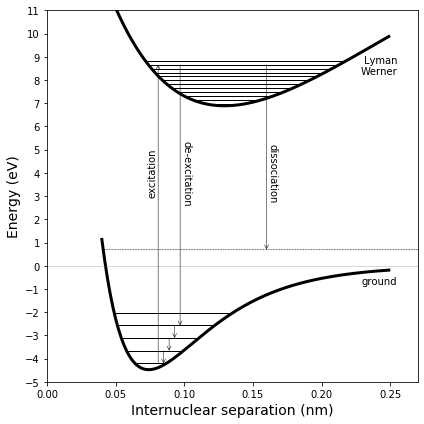

In [2]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

ax.set_xlim(0,0.27)
ax.set_ylim(-5, 11)
ax.set_yticks(np.arange(-5,11.5,1))
ax.set_xlabel(r'Internuclear separation (nm)', fontsize=14)
ax.set_ylabel(r'Energy (eV)', fontsize=14)

r = np.arange(0.04,0.25,0.001)

# energies and internuclear distances from https://webbook.nist.gov/
# potential energy of ground state
D0 = 4.478
r0 = 0.074144
alpha0 = 22     # ad hoc for now :(
V0 = D0 * (1 - np.exp(-alpha0 * (r - r0)))**2 - D0
ax.plot(r, V0, 'k-', lw=3, alpha=1)
#ax.text(0.215,-0.65,'ground', rotation=6, fontsize=10, ha='left', va='center')
ax.text(0.255,-0.65,'ground', fontsize=10, ha='right', va='center')

# vibrational levels
Evib0 = 0.5457
for n in range(0,5):
    E = (n+0.5)*Evib0 - D0
    i = np.where(V0 < E)[0]
    ax.plot([r[i[0]],r[i[-1]]], [E,E], 'k-', lw=1)

# unstable level
n = 9
E = (n+0.5)*Evib0 - D0
i = np.where(V0 < E)[0]
ax.plot([r[i[0]],0.3], [E,E], color='black', linestyle='dashed', lw=0.5)

# potential energy of Lyman excited state
D1 = 11.369
r1 = 0.12928
alpha1 = 6
V1 = D1 * (1 - np.exp(-alpha1 * (r - r1)))**2 - D0 + D1
ax.plot(r, V1, 'k-', lw=3, alpha=1)
#ax.text(0.22,8.35,r'$B^1\Sigma_u^+$', fontsize=12, ha='left')
#ax.text(0.215,8.7,'Lyman', rotation=30, fontsize=10, ha='left', va='center')
ax.text(0.255,8.85,'Lyman', fontsize=10, ha='right', va='center')
ax.text(0.255,8.4,'Werner', fontsize=10, ha='right', va='center')

# vibrational levels
Evib1 = 0.1684
for n in range(0,12):
    E = (n+0.5)*Evib1 - D0 + D1
    i = np.where(V1 < E)[0]
    ax.plot([r[i[0]],r[i[-1]]], [E,E], 'k-',lw=1)

# zero energy to visualize unbound H2 == dissociation
ax.plot([0,0.3], [0,0], color='grey', linestyle='solid', linewidth=1, alpha=0.3)

# transitions
# excitation from ground to Lyman
r0 = 0.081
E0 = 0.5*Evib0 - D0
E1 = 10.5*Evib1 - D0 + D1
ax.annotate('', xy=(r0,E1), xytext=(r0,E0),
    arrowprops={'arrowstyle':'->', 'lw':0.5, 'shrinkA':0, 'shrinkB':0},
    ha='center', va='center')
ax.text(0.073,4,'excitation', rotation=90, fontsize=10, va='center')

# de-excitation to bound ground state
r1 = 0.097
E0 = 3.5*Evib0 - D0
E1 = 10.5*Evib1 - D0 + D1
ax.annotate('', xy=(r1,E0), xytext=(r1,E1),
    arrowprops={'arrowstyle':'->', 'lw':0.5, 'shrinkA':0, 'shrinkB':0},
    ha='center', va='center')
ax.text(0.098,4,'de-excitation', rotation=-90, fontsize=10, va='center')

# vibrational cascade through ground state levels
r1 = 0.093
E0 = 3.5*Evib0 - D0
E1 = 2.5*Evib0 - D0
ax.annotate('', xy=(r1,E1), xytext=(r1,E0),
    arrowprops={'arrowstyle':'->', 'lw':0.5, 'shrinkA':0, 'shrinkB':0},
    ha='center', va='center')
r1 = 0.089
E0 = 2.5*Evib0 - D0
E1 = 1.5*Evib0 - D0
ax.annotate('', xy=(r1,E1), xytext=(r1,E0),
    arrowprops={'arrowstyle':'->', 'lw':0.5, 'shrinkA':0, 'shrinkB':0},
    ha='center', va='center')
r1 = 0.085
E0 = 1.5*Evib0 - D0
E1 = 0.5*Evib0 - D0
ax.annotate('', xy=(r1,E1), xytext=(r1,E0),
    arrowprops={'arrowstyle':'->', 'lw':0.5, 'shrinkA':0, 'shrinkB':0},
    ha='center', va='center')

# de-excitation to unbound vibrational state => dissociation
r2 = 0.16
E0 = 9.5*Evib0 - D0
E1 = 10.5*Evib1 - D0 + D1
ax.annotate('', xy=(r2,E0), xytext=(r2,E1),
    arrowprops={'arrowstyle':'->', 'lw':0.5, 'shrinkA':0, 'shrinkB':0},
    ha='center', va='center')
ax.text(0.161,4,'dissociation', rotation=-90, fontsize=10, va='center')

fig.tight_layout()
plt.savefig('H2_potential.pdf')